<a href="https://colab.research.google.com/github/packtpublishing/Machine-Learning-for-Imbalanced-Data/blob/main/chapter09/GNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install -q torch-geometric==2.2.0 torch-sparse==0.6.17 torch-scatter==2.1.1 -f https://data.pyg.org/whl/torch-{torch.__version__}.html

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 34.8 MB/s eta 0:00:00


In [2]:
import torch
import numpy as np
import random

torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.cuda.manual_seed_all(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(0)
random.seed(0)

In [5]:
import pandas as pd
from torch_geometric.datasets import FacebookPagePage

dataset = FacebookPagePage(root=".")
data = dataset[0]

# print info about the dataset
print(f"Dataset: {dataset}")
print("-----------------------")
print(f"Number of graphs: {len(dataset)}")
print(f"Number of nodes: {data.x.shape[0]}")
print(f"Number of features: {dataset.num_features}")
print(f"Number of classes: {dataset.num_classes}")
print(f"Number of graphs: {len(dataset)}")
print(f"Number of edge features: {dataset.num_edge_features}")
print(f"Number of nodes: {data.num_nodes}")
print(f"Number of edges: {data.num_edges}")
print(f"Average node degree: {data.num_edges / data.num_nodes:.2f}")
print(f"Contains isolated nodes: {data.has_isolated_nodes()}")
print(f"Contains self-loops: {data.has_self_loops()}")
print(f"Is undirected: {data.is_undirected()}")

# show the features and label in a tabular format
dfx = pd.DataFrame(data.x.numpy())
dfx["label"] = pd.DataFrame(data.y)
dfx

Processing...
Done!


Dataset: FacebookPagePage()
-----------------------
Number of graphs: 1
Number of nodes: 22470
Number of features: 128
Number of classes: 4
Number of graphs: 1
Number of edge features: 0
Number of nodes: 22470
Number of edges: 342004
Average node degree: 15.22
Contains isolated nodes: False
Contains self-loops: True
Is undirected: True


,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,label
0,-0.262576,-0.276483,-0.262350,-0.299327,-0.299159,-0.270681,-0.307757,-0.269733,-0.25101,-0.308343,...,-0.273229,-0.223700,-0.284379,-0.224216,-0.209509,-0.255755,-0.215140,-0.375903,-0.223836,0
1,-0.262576,-0.276483,-0.262350,-0.299327,-0.299159,-0.270681,-0.307757,-0.269733,-0.25101,-0.308343,...,-0.234818,-0.223700,-0.284379,-0.197935,-0.147256,-0.255755,-0.215140,-0.364134,-0.128634,2
2,-0.262576,-0.265053,-0.262350,-0.299327,-0.299159,-0.270681,-0.307757,-0.210461,-0.25101,3.222161,...,-0.273229,-0.223700,-0.284379,-0.224216,-0.209509,-0.255755,-0.215140,-0.375903,-0.223836,1
3,-0.246378,-0.276483,-0.241991,-0.299327,-0.299159,-0.270681,-0.307051,-0.269733,-0.25101,-0.308343,...,-0.273229,-0.223700,-0.265534,-0.080353,-0.209509,-0.250560,-0.180260,-0.375903,-0.223836,2
4,-0.262576,-0.276483,-0.262350,-0.299327,-0.299159,-0.270681,-0.307757,-0.269733,-0.25101,-0.308343,...,-0.273229,-0.175312,-0.272613,-0.224216,-0.181153,-0.255755,-0.215140,-0.370639,-0.223836,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22465,-0.262576,-0.276483,-0.262350,-0.296955,-0.299159,-0.270681,-0.307757,-0.269733,-0.25101,-0.308343,...,-0.273229,-0.223700,-0.284379,-0.224216,-0.209509,-0.255755,-0.196685,-0.370115,-0.223836,3
22466,-0.262576,-0.276483,-0.262350,-0.299327,-0.299159,-0.270681,-0.307757,-0.269733,-0.25101,-0.308343,...,-0.273229,-0.221643,-0.284379,-0.224216,-0.209509,-0.255755,-0.215140,-0.375903,-0.223836,1
22467,-0.262576,-0.276483,-0.262350,-0.299327,-0.299159,-0.270681,-0.307757,-0.269733,-0.25101,-0.308343,...,-0.273229,-0.223700,-0.284379,-0.224216,-0.146793,-0.255755,-0.180389,-0.372097,-0.222613,2
22468,-0.262576,-0.276483,-0.262350,-0.299327,-0.299159,-0.270681,-0.307668,-0.269733,-0.25101,-0.308343,...,-0.273229,-0.223700,-0.284379,-0.224216,-0.209509,-0.252456,-0.215140,-0.375903,-0.218148,1


In [6]:
from torch_geometric.utils import to_dense_adj

# Create masks
data.train_mask = range(18000)
data.val_mask = range(18001, 20000)
data.test_mask = range(20001, 22470)

# Adjacency matrix
adjacency = to_dense_adj(data.edge_index)[0]
adjacency += torch.eye(len(adjacency))
adjacency

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.]])

In [7]:
print(data.x[0])

tensor([-0.2626, -0.2765, -0.2624, -0.2993, -0.2992, -0.2707, -0.3078, -0.2697,
        -0.2510, -0.3083, -0.3702, -0.2257, -0.2773, -0.4484, -0.3127, -0.1475,
        -0.2658, -0.3512, -0.2864, -0.1716, -0.2636, -0.2405, -0.1809, -0.2233,
        -0.2109, -0.4077, -0.2733, -0.2454, -0.2727, -0.2096, -0.2025, -0.2894,
        -0.2657, -0.4149, -0.2278, -0.2183, -0.3146, -0.3444, -0.1876, -0.1912,
        -0.3012, -0.3117, -0.1762, -0.2389, -0.2053, -0.1912, -0.2558, -0.2034,
        -0.2479, -0.2715, -0.3031, -0.2698, -0.2262,  3.3398, -0.3071, -0.2116,
        -0.2784, -0.2987, -0.3605, -0.2487, -0.2801, -0.2067,  0.3931, -0.3063,
        -0.2159, -0.2407,  0.2434, -0.2204, -0.2196, -0.2343, -0.1427, -0.2566,
        -0.2787, -0.1535, -0.1822, -0.2439, -0.2701, -0.2878, -0.1846, -0.2401,
        -0.2520, -0.2174, -0.2742, -0.4552, -0.2763,  6.3814, -0.1880, -0.3621,
        -0.2370, -0.2380, -0.3073, -0.2643, -0.2724, -0.2327, -0.2046, -0.2470,
        -0.3129, -0.2019, -0.2382, -0.27

In [8]:
from collections import Counter

Counter([x.item() for x in data.y[data.test_mask]])

Counter({3: 642, 1: 698, 2: 754, 0: 375})

In [9]:
Counter([x.item() for x in data.y[data.train_mask]])

Counter({0: 2642, 2: 5522, 1: 5209, 3: 4627})

# generate imbalanced dataset


In [10]:
from torch_geometric.utils.dropout import dropout_adj
import random

num_classes = 4
classe_labels = range(num_classes)


def get_img_num_per_cls(data, num_classes=4, imb_type="exp", imb_factor=0.01):
    img_max = len(data) / num_classes
    img_num_per_cls = []
    if imb_type == "exp":
        for cls_idx in range(num_classes):
            num = img_max * (imb_factor ** (cls_idx / (num_classes - 1.0))) + 200
            img_num_per_cls.append(int(num))
    return img_num_per_cls


def gen_imbalanced_data(targets, img_num_per_cls):
    targets_np = np.array(targets, dtype=np.int64)
    classes = np.unique(targets_np)
    num_per_cls_dict = dict()
    idx_to_remove = []
    for the_class, the_img_num in zip(classes, img_num_per_cls):
        num_per_cls_dict[the_class] = the_img_num
        idx = np.where(targets_np == the_class)[0]
        np.random.shuffle(idx)
        selec_idx = idx[:the_img_num]
        idx_to_remove.extend(list(np.setdiff1d(idx, selec_idx)))
    return idx_to_remove


def drop_node_and_edges(x, y, adjacency):
    img_num_per_cls = get_img_num_per_cls(y)
    idx_to_remove = gen_imbalanced_data(y, img_num_per_cls)

    x = np.delete(x, idx_to_remove, 0)
    y = np.delete(y, idx_to_remove, 0)
    adjacency = np.delete(adjacency, idx_to_remove, 0)
    adjacency = np.delete(adjacency, idx_to_remove, 1)

    return x, y, adjacency

In [11]:
import numpy as np


def print_class_proportions(y1):
    counter = Counter(y1.numpy())
    print(sorted(counter.items()))
    total = len(y1)
    for class_id, count in counter.items():
        proportion = count / total
        print(f"Class {class_id}: {proportion * 100:.2f}%")


# Print proportion of various classes in the dataset
print("Proportion of various classes before droping nodes")
print_class_proportions(data.y)

# Make the dataset extremely imbalanced
x1, y1, adjacency1 = drop_node_and_edges(data.x, data.y, adjacency)

# Print proportion of various classes in the dataset
print_class_proportions(y1)

print("number of nodes before droping nodes: " + str(len(data.x)))
print("number of nodes after droping nodes: " + str(len(x1)))
print("shape of adjacency before droping nodes: " + str(adjacency.size()))
print("shape of adjacency after droping nodes: " + str(adjacency1.size()))

Proportion of various classes before droping nodes
[(0, 3327), (1, 6495), (2, 6880), (3, 5768)]
Class 0: 14.81%
Class 2: 30.62%
Class 1: 28.91%
Class 3: 25.67%
[(0, 3327), (1, 1410), (2, 460), (3, 256)]
Class 0: 61.01%
Class 2: 8.44%
Class 1: 25.86%
Class 3: 4.69%
number of nodes before droping nodes: 22470
number of nodes after droping nodes: 5453
shape of adjacency before droping nodes: torch.Size([22470, 22470])
shape of adjacency after droping nodes: torch.Size([5453, 5453])


Distribution of classes in Imbalanced dataset:
Counter({0: 3327, 1: 1410, 2: 460, 3: 256})


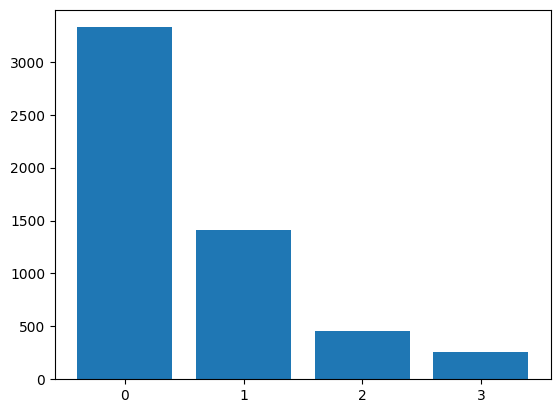

In [12]:
import matplotlib.pyplot as plt

print("Distribution of classes in Imbalanced dataset:")
print(Counter(y1.numpy()))
fig, ax = plt.subplots()
_, counts = np.unique(y1.numpy(), return_counts=True)

ax.bar(range(4), counts)
ax.set_xticks(range(4))
plt.rc("xtick", labelsize=10)
plt.rc("ytick", labelsize=10)
plt.show()

In [13]:
len(y1.numpy())

5453

In [14]:
from torch_geometric.data import Data
from torch_geometric.utils import dense_to_sparse

data1 = Data(x=x1, edge_index=dense_to_sparse(adjacency1)[0], y=y1)

# split data
# Create masks
data1.train_mask = range(4368)
data1.val_mask = range(4368, 4611)
data1.test_mask = range(4611, 4853)

In [15]:
# print proportion in training set
print_class_proportions(data1.y[:4368])

[(0, 2643), (1, 1153), (2, 368), (3, 204)]
Class 0: 60.51%
Class 2: 8.42%
Class 1: 26.40%
Class 3: 4.67%


In [16]:
# print proportion in validation set
print_class_proportions(data1.y[4368:4611])

[(0, 155), (1, 58), (2, 22), (3, 8)]
Class 0: 63.79%
Class 1: 23.87%
Class 3: 3.29%
Class 2: 9.05%


In [17]:
# print proportion in test set
print_class_proportions(data1.y[4611:4853])

[(0, 146), (1, 59), (2, 21), (3, 16)]
Class 0: 60.33%
Class 2: 8.68%
Class 1: 24.38%
Class 3: 6.61%


In [18]:
X_train, X_test, y_train, y_test = (
    data1.x[data1.train_mask].cpu().numpy(),
    data1.x[data1.test_mask].cpu().numpy(),
    data1.y[data1.train_mask].cpu().numpy(),
    data1.y[data1.test_mask].cpu().numpy(),
)

In [19]:
# Adapted from https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html

import torch.nn.functional as F
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from itertools import cycle


def display_precision_recall_curve(y1_test_one_hot, y1_score, model_name):
    # For each class
    precision = dict()
    recall = dict()
    average_precision = dict()
    n_classes = 4
    for i in range(n_classes):
        precision[i], recall[i], _ = precision_recall_curve(
            y1_test_one_hot[:, i], y1_score[:, i]
        )
        average_precision[i] = average_precision_score(
            y1_test_one_hot[:, i], y1_score[:, i]
        )

    # A "micro-average": quantifying score on all classes jointly
    precision["micro"], recall["micro"], _ = precision_recall_curve(
        y1_test_one_hot.ravel(), y1_score.ravel()
    )
    average_precision["micro"] = average_precision_score(
        y1_test_one_hot, y1_score, average="micro"
    )
    # setup plot details
    colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue", "teal"])

    _, ax = plt.subplots(figsize=(8, 6))

    lines, labels = [], []

    display = PrecisionRecallDisplay(
        recall=recall["micro"],
        precision=precision["micro"],
        average_precision=average_precision["micro"],
    )
    display.plot(ax=ax, name="Micro-average precision-recall", color="gold")

    linestyle = ["-", "--", "-.", "dotted"]
    idxls = 0
    for i, color in zip(range(n_classes), colors):
        display = PrecisionRecallDisplay(
            recall=recall[i],
            precision=precision[i],
            average_precision=average_precision[i],
        )
        display.plot(
            ax=ax,
            name=f"Precision-recall for class {i}",
            linestyle=linestyle[idxls],
            color=color,
        )
        idxls += 1

    # add the legend for the iso-f1 curves
    handles, labels = display.ax_.get_legend_handles_labels()
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    # ax.legend(bbox_to_anchor=(1.05, 1.0), loc='lower left')
    ax.legend(handles=handles, labels=labels, loc="lower left", fontsize=12)
    ax.set_title("Multi-class Precision-Recall curve | " + model_name)

    plt.show()


def print_class_wise_accuracy(y_pred):
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)

    # Calculate class-wise accuracy
    class_accuracy = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)
    class_labels = [str(i) for i in range(len(class_accuracy))]

    # Create bar plot
    plt.figure(figsize=(10, 6))
    plt.bar(class_labels, class_accuracy)
    plt.xlabel("Class Labels")
    plt.ylabel("Accuracy")
    plt.title("Class-wise Accuracy")
    plt.xticks(class_labels)
    plt.ylim([0, 1])

    # Annotate the bars with the accuracy values
    for i, acc in enumerate(class_accuracy):
        plt.text(i, acc + 0.02, f"{100*acc:.2f}", ha="center")

    plt.show()
    return class_accuracy * 100

In [20]:
import torch
from torch.nn import Linear
import torch.nn.functional as F

# Set the random seed for PyTorch for reproducibility.
torch.manual_seed(0)


def calculate_accuracy(predicted_labels, true_labels):
    """Calculates accuracy of model predictions."""
    correct_predictions = torch.sum(predicted_labels == true_labels)
    total_predictions = len(true_labels)
    return correct_predictions / total_predictions


class MultiLayerPerceptron(torch.nn.Module):
    """Implements a Multilayer Perceptron (MLP) model."""

    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.linear_layer1 = Linear(input_dim, hidden_dim)
        self.linear_layer2 = Linear(hidden_dim, output_dim)

    def forward(self, x):
        """Forward pass of the MLP."""
        x = self.linear_layer1(x)
        x = torch.relu(x)
        x = self.linear_layer2(x)
        return F.log_softmax(x, dim=1)

    def train_model(self, data, num_epochs):
        """Trains the MLP model."""
        loss_function = torch.nn.NLLLoss()  # torch.nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(self.parameters(), lr=0.01, weight_decay=5e-4)

        self.train()

        for epoch in range(num_epochs + 1):
            optimizer.zero_grad()
            model_output = self(data.x)
            true_train_labels = data.y[data.train_mask]

            loss = loss_function(model_output[data.train_mask], true_train_labels)
            accuracy = calculate_accuracy(
                model_output[data.train_mask].argmax(dim=1), true_train_labels
            )

            loss.backward()
            optimizer.step()

            if epoch % 20 == 0:
                true_val_labels = data.y[data.val_mask]
                val_loss = loss_function(model_output[data.val_mask], true_val_labels)
                val_accuracy = calculate_accuracy(
                    model_output[data.val_mask].argmax(dim=1), true_val_labels
                )

                print(
                    f"Epoch {epoch:>3} | Train Loss: {loss:.3f} | Train Acc: {accuracy*100:.2f}% | "
                    f"Val Loss: {val_loss:.2f} | Val Acc: {val_accuracy*100:.2f}%"
                )

    @torch.no_grad()
    def evaluate_model(self, data):
        """Evaluates the MLP model."""
        self.eval()

        model_output = self(data.x)
        test_accuracy = calculate_accuracy(
            model_output.argmax(dim=1)[data.test_mask], data.y[data.test_mask]
        )

        return test_accuracy, model_output[data.test_mask, :]

In [21]:
mlp_model = MultiLayerPerceptron(input_dim=128, hidden_dim=64, output_dim=4)
mlp_model.train_model(data1, 100)
acc, _ = mlp_model.evaluate_model(data1)
print(f"\nMLP test accuracy: {acc*100:.2f}%\n")

Epoch   0 | Train Loss: 1.376 | Train Acc: 24.31% | Val Loss: 1.39 | Val Acc: 18.93%
Epoch  20 | Train Loss: 0.448 | Train Acc: 82.76% | Val Loss: 0.53 | Val Acc: 81.89%
Epoch  40 | Train Loss: 0.345 | Train Acc: 87.25% | Val Loss: 0.53 | Val Acc: 80.25%
Epoch  60 | Train Loss: 0.280 | Train Acc: 90.00% | Val Loss: 0.57 | Val Acc: 81.07%
Epoch  80 | Train Loss: 0.235 | Train Acc: 91.62% | Val Loss: 0.62 | Val Acc: 81.07%
Epoch 100 | Train Loss: 0.204 | Train Acc: 92.83% | Val Loss: 0.64 | Val Acc: 81.07%

MLP test accuracy: 76.45%



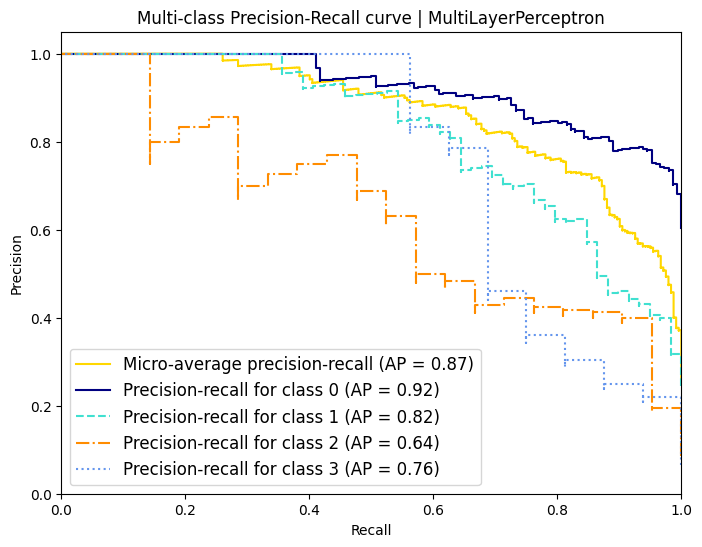

In [22]:
_, y1_score = mlp_model.evaluate_model(data1)
y1_test_one_hot = F.one_hot(data1.y[data1.test_mask], num_classes=4)
display_precision_recall_curve(y1_test_one_hot, y1_score, "MultiLayerPerceptron")

Confusion Matrix:
[[124  18   3   1]
 [ 16  43   0   0]
 [  9   3   7   2]
 [  4   1   0  11]]


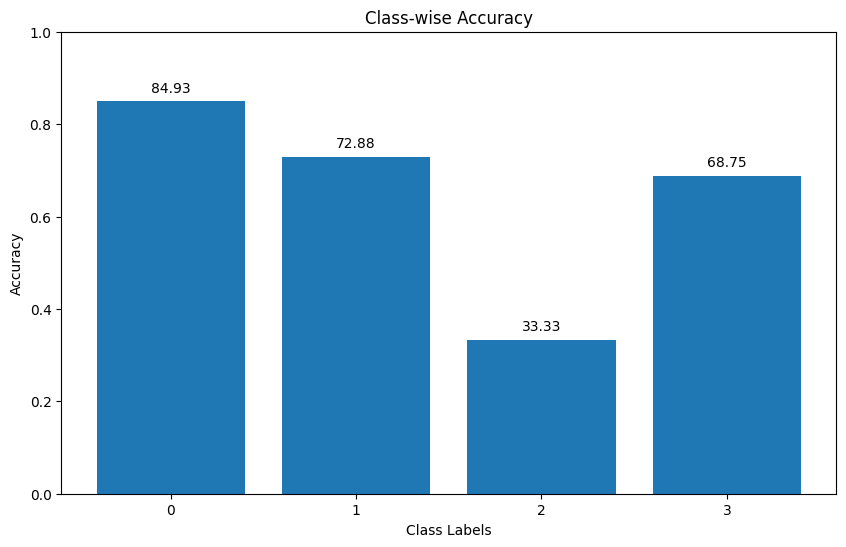

In [23]:
y_pred_mlp = np.argmax(y1_score, axis=1)
class_accuracy_mlp = print_class_wise_accuracy(y_pred_mlp)

In [24]:
# Adapted from https://github.com/PacktPublishing/Hands-On-Graph-Neural-Networks-Using-Python/blob/main/Chapter05/chapter5.ipynb


class GraphNeuralNetworkLayer(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.linear_transform = Linear(input_dim, output_dim, bias=False)

    def forward(self, node_features, adjacency_matrix):
        transformed_features = self.linear_transform(node_features)
        propagated_features = torch.sparse.mm(adjacency_matrix, transformed_features)
        return propagated_features


class GraphNeuralNetwork(torch.nn.Module):
    """Vanilla Graph Neural Network"""

    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.gnn_layer1 = GraphNeuralNetworkLayer(input_dim, hidden_dim)
        self.gnn_layer2 = GraphNeuralNetworkLayer(hidden_dim, output_dim)

    def forward(self, node_features, adjacency_matrix):
        hidden_representations = self.gnn_layer1(node_features, adjacency_matrix)
        hidden_representations = torch.relu(hidden_representations)
        output_representations = self.gnn_layer2(
            hidden_representations, adjacency_matrix
        )
        return F.log_softmax(output_representations, dim=1)

    def train_model(self, data, adjacency_matrix, num_epochs):
        loss_function = torch.nn.NLLLoss()  # torch.nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(self.parameters(), lr=0.01, weight_decay=5e-4)

        self.train()

        for epoch in range(num_epochs + 1):
            optimizer.zero_grad()
            model_output = self(data.x, adjacency_matrix)

            true_train_labels = data.y[data.train_mask]
            loss = loss_function(model_output[data.train_mask], true_train_labels)
            accuracy = calculate_accuracy(
                model_output[data.train_mask].argmax(dim=1), true_train_labels
            )

            loss.backward()
            optimizer.step()

            if epoch % 20 == 0:
                true_val_labels = data.y[data.val_mask]
                val_loss = loss_function(model_output[data.val_mask], true_val_labels)
                val_accuracy = calculate_accuracy(
                    model_output[data.val_mask].argmax(dim=1), true_val_labels
                )

                print(
                    f"Epoch {epoch:>3} | Train Loss: {loss:.3f} | Train Acc: {accuracy*100:.2f}% | "
                    f"Val Loss: {val_loss:.2f} | Val Acc: {val_accuracy*100:.2f}%"
                )

    @torch.no_grad()
    def evaluate_model(self, data, adjacency_matrix):
        """Evaluates the GNN model."""
        self.eval()

        model_output = self(data.x, adjacency_matrix)
        test_accuracy = calculate_accuracy(
            model_output.argmax(dim=1)[data.test_mask], data.y[data.test_mask]
        )

        return test_accuracy, model_output[data.test_mask, :]

In [25]:
gnn_model = GraphNeuralNetwork(input_dim=128, hidden_dim=64, output_dim=4)
gnn_model.train_model(data1, adjacency1, 100)
acc, _ = gnn_model.evaluate_model(data1, adjacency1)
print(f"\nGNN test accuracy: {acc*100:.2f}%\n")

Epoch   0 | Train Loss: 12.600 | Train Acc: 18.43% | Val Loss: 14.06 | Val Acc: 12.35%
Epoch  20 | Train Loss: 1.108 | Train Acc: 80.65% | Val Loss: 1.59 | Val Acc: 82.30%
Epoch  40 | Train Loss: 0.604 | Train Acc: 83.36% | Val Loss: 0.78 | Val Acc: 82.30%
Epoch  60 | Train Loss: 0.434 | Train Acc: 86.63% | Val Loss: 0.73 | Val Acc: 85.60%
Epoch  80 | Train Loss: 0.774 | Train Acc: 84.32% | Val Loss: 1.22 | Val Acc: 83.13%
Epoch 100 | Train Loss: 2.699 | Train Acc: 85.03% | Val Loss: 6.26 | Val Acc: 87.24%

GNN test accuracy: 87.19%



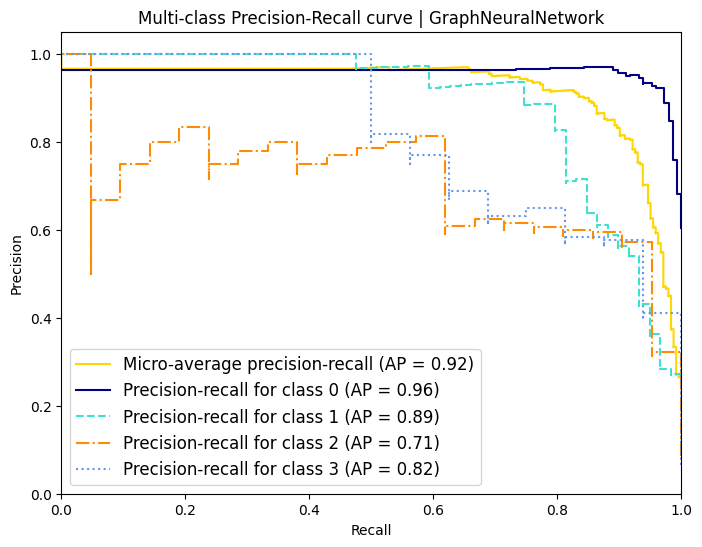

In [26]:
_, y1_score = gnn_model.evaluate_model(data1, adjacency1)
y1_test_one_hot = F.one_hot(data1.y[data1.test_mask], num_classes=4)
display_precision_recall_curve(y1_test_one_hot, y1_score, "GraphNeuralNetwork")

Confusion Matrix:
[[142   2   1   1]
 [ 12  46   1   0]
 [  2   3  14   2]
 [  2   1   4   9]]


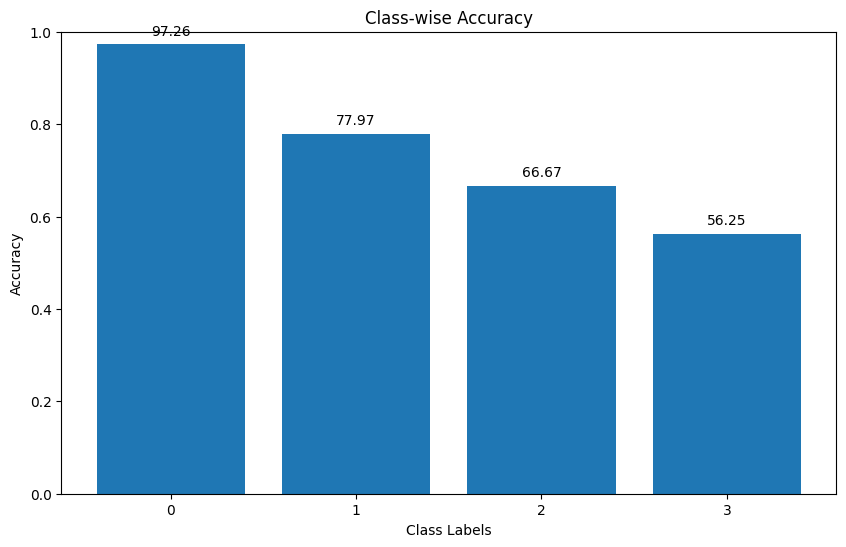

In [27]:
y_pred_gnn = np.argmax(y1_score, axis=1)
class_accuracy_gnn = print_class_wise_accuracy(y_pred_gnn)

In [28]:
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    average_precision_score,
    roc_auc_score,
)
import time

xgb_clf = XGBClassifier(eval_metric="logloss")
xgb_clf.fit(X_train, y_train)
y_pred_proba = xgb_clf.predict_proba(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)

test_acc = accuracy_score(y_test, np.argmax(y_pred_proba, axis=1))
test_acc

0.8388429752066116

Confusion Matrix:
[[139   4   3   0]
 [ 12  46   1   0]
 [  6   2  12   1]
 [  8   1   1   6]]


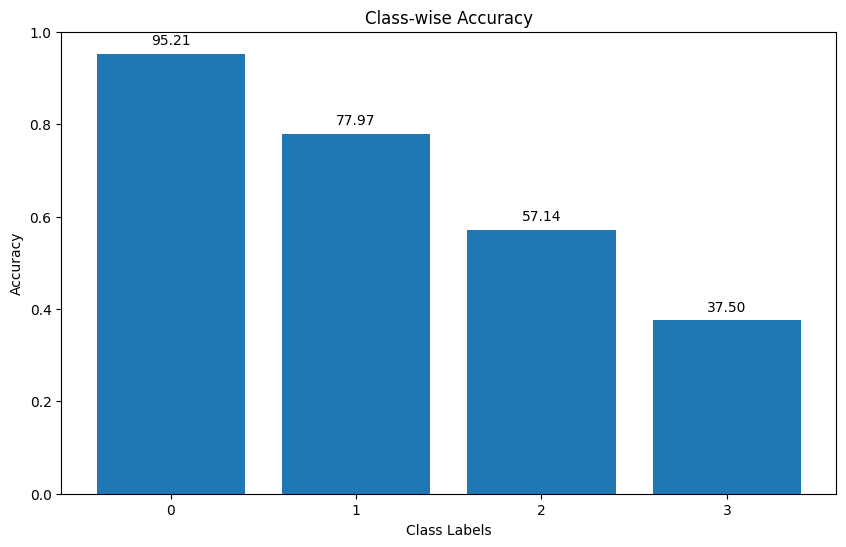

In [29]:
class_accuracy_xgb = print_class_wise_accuracy(y_pred)

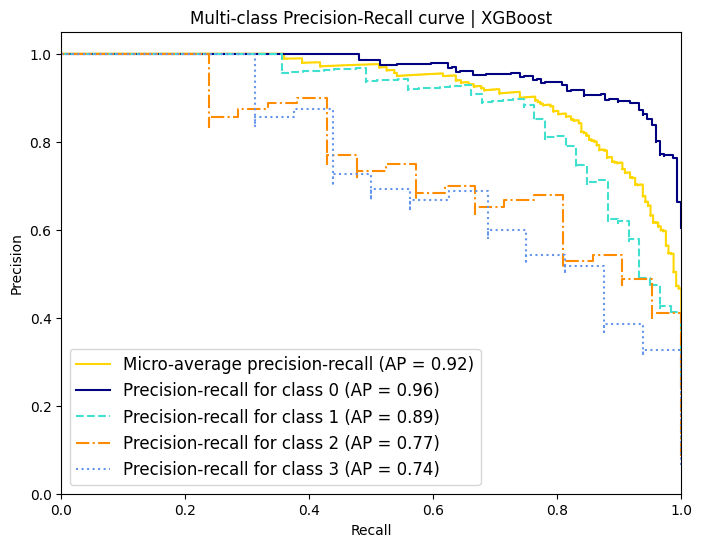

In [30]:
y1_test_one_hot = F.one_hot(data1.y[data1.test_mask], num_classes=4)
display_precision_recall_curve(y1_test_one_hot, y_pred_proba, "XGBoost")

In [31]:
import torch
from torch_geometric.nn import GCNConv
import torch.nn.functional as F

torch.manual_seed(1)


def compute_accuracy(predicted_labels, true_labels):
    correct_predictions = torch.sum(predicted_labels == true_labels)
    total_predictions = len(true_labels)
    return correct_predictions / total_predictions


class GraphConvolutionalNetwork(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.convolution_layer1 = GCNConv(input_dim, hidden_dim)
        self.convolution_layer2 = GCNConv(hidden_dim, output_dim)

    def forward(self, node_features, edge_index):
        hidden_representation = self.convolution_layer1(node_features, edge_index)
        hidden_representation = torch.relu(hidden_representation)
        output_representation = self.convolution_layer2(
            hidden_representation, edge_index
        )

        return F.log_softmax(output_representation, dim=1)

    def train_model(self, data, num_epochs):
        loss_function = torch.nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(self.parameters(), lr=0.01, weight_decay=5e-4)

        self.train()

        for epoch in range(num_epochs + 1):
            optimizer.zero_grad()

            network_output = self(data.x, data.edge_index)
            true_train_labels = data.y[data.train_mask]

            loss = loss_function(network_output[data.train_mask], true_train_labels)
            accuracy = compute_accuracy(
                network_output[data.train_mask].argmax(dim=1), true_train_labels
            )

            loss.backward()
            optimizer.step()

            if epoch % 20 == 0:
                true_val_labels = data.y[data.val_mask]
                val_loss = loss_function(network_output[data.val_mask], true_val_labels)
                val_accuracy = compute_accuracy(
                    network_output[data.val_mask].argmax(dim=1), true_val_labels
                )

                print(
                    f"Epoch: {epoch}\n"
                    f"Train Loss: {loss:.3f}, Accuracy: {accuracy*100:.0f}%\n"
                    f"Validation Loss: {val_loss:.2f}, Accuracy: {val_accuracy*100:.0f}%\n"
                    "-------------------"
                )

    @torch.no_grad()
    def evaluate_model(self, data):
        self.eval()

        network_output = self(data.x, data.edge_index)
        test_accuracy = compute_accuracy(
            network_output.argmax(dim=1)[data.test_mask], data.y[data.test_mask]
        )

        return test_accuracy, network_output[data.test_mask, :]

In [32]:
# Train GCN
gcn = GraphConvolutionalNetwork(dataset.num_features, 16, dataset.num_classes)
gcn.train_model(data1, num_epochs=100)
acc, _ = gcn.evaluate_model(data1)
print(f"\nGCN test accuracy: {acc*100:.2f}%\n")

Epoch: 0
Train Loss: 1.424, Accuracy: 31%
Validation Loss: 1.41, Accuracy: 30%
-------------------
Epoch: 20
Train Loss: 0.422, Accuracy: 85%
Validation Loss: 0.44, Accuracy: 86%
-------------------
Epoch: 40
Train Loss: 0.303, Accuracy: 90%
Validation Loss: 0.38, Accuracy: 88%
-------------------
Epoch: 60
Train Loss: 0.251, Accuracy: 91%
Validation Loss: 0.37, Accuracy: 88%
-------------------
Epoch: 80
Train Loss: 0.217, Accuracy: 93%
Validation Loss: 0.38, Accuracy: 88%
-------------------
Epoch: 100
Train Loss: 0.190, Accuracy: 94%
Validation Loss: 0.36, Accuracy: 89%
-------------------

GCN test accuracy: 90.91%



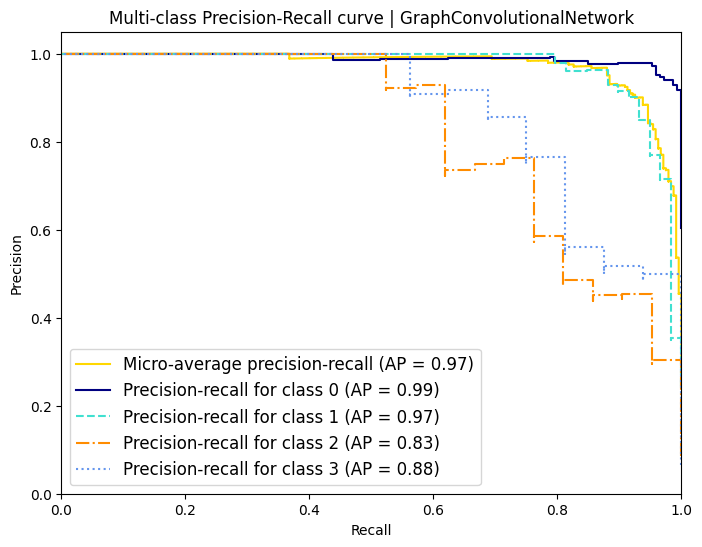

In [33]:
_, y1_score = gcn.evaluate_model(data1)
y1_test_one_hot = F.one_hot(data1.y[data1.test_mask], num_classes=4)
display_precision_recall_curve(y1_test_one_hot, y1_score, "GraphConvolutionalNetwork")

Confusion Matrix:
[[141   4   0   1]
 [  5  52   2   0]
 [  2   3  15   1]
 [  0   1   3  12]]


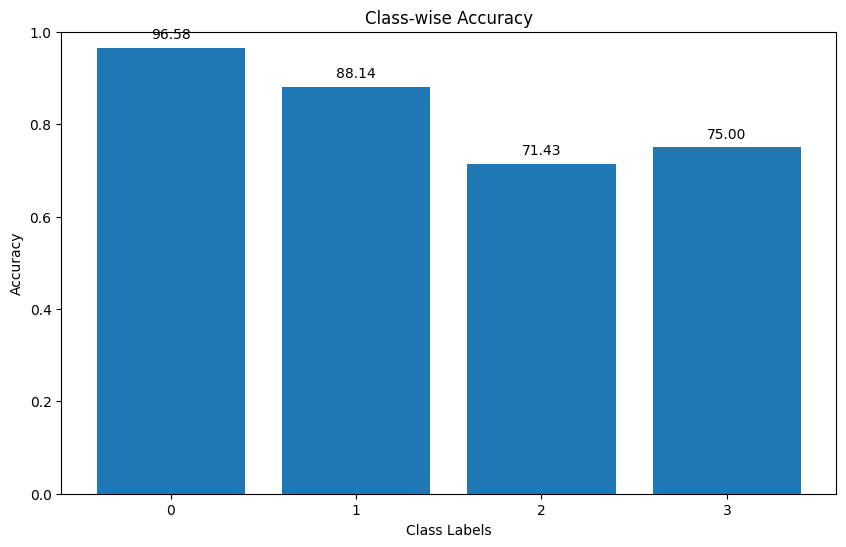

In [34]:
y_pred_gcn = np.argmax(y1_score, axis=1)
class_accuracy_gcn = print_class_wise_accuracy(y_pred_gcn)

In [35]:
import pandas as pd

# Create a dictionary of lists
data = {
    "MLP": class_accuracy_mlp,
    "XGB": class_accuracy_xgb,
    "GCN": class_accuracy_gcn,
    "GNN": class_accuracy_gnn,
}

# Create a dataframe
df = pd.DataFrame.from_dict(data).round(2)

# Print the dataframe
print(df)

     MLP    XGB    GCN    GNN
0  84.93  95.21  96.58  97.26
1  72.88  77.97  88.14  77.97
2  33.33  57.14  71.43  66.67
3  68.75  37.50  75.00  56.25


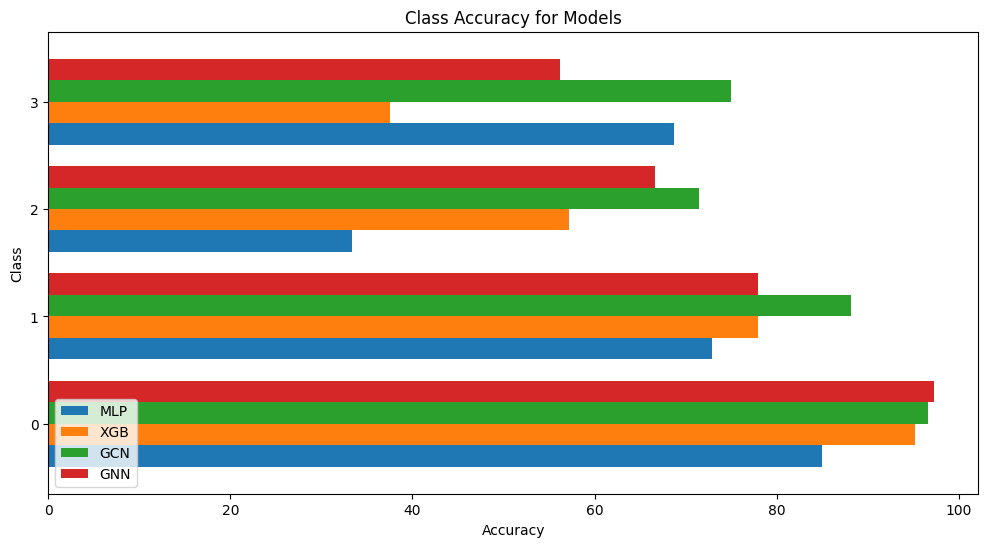

In [36]:
ax = df.plot.barh(figsize=(12, 6), width=0.8)

ax.set_ylabel("Class")
ax.set_xlabel("Accuracy")
ax.set_title("Class Accuracy for Models")
ax.legend(loc="lower left")


plt.show()